In [1]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/home/l2-40/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Class Proportions:
Non_Monkeypox: 619 Monkeypox: 697


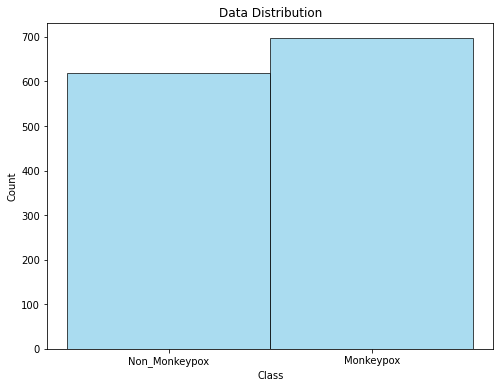

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-40/Downloads/1325_images-20240912T033744Z-001/1325_images"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Monkeypox and Non_Monkeypox)
for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Non_Monkeypox, 1 for Monkeypox) to the labels list
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Non_Monkeypox:", np.sum(labels == 0), "Monkeypox:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


In [3]:
# Balance the dataset with 600 images from each class (Non_Monkeypox and Monkeypox)
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

# Concatenate the data back together
balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Non_Monkeypox Images:", non_monkeypox_images.shape)
print("Monkeypox Images:", monkeypox_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Non_Monkeypox Images: (600, 224, 224)
Monkeypox Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


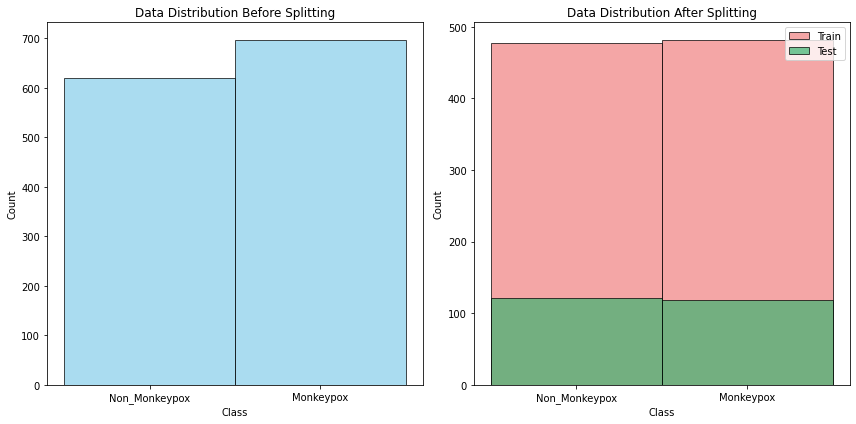

In [4]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))

# Before splitting (Original data)
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# After splitting (Train and Test sets)
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
from collections import Counter

def check_dataset_balance(labels):
    # Count the occurrences of each class label
    label_counts = Counter(labels)

    # Print the counts for each class
    print("Class distribution in the dataset:")
    for label, count in label_counts.items():
        class_name = "Monkeypox" if label == 1 else "Non_Monkeypox"
        print(f"{class_name}: {count} images")

    # Check if the dataset is balanced
    counts = list(label_counts.values())
    min_count = min(counts)
    max_count = max(counts)

    is_balanced = min_count == max_count

    if is_balanced:
        print("The dataset is balanced.")
    else:
        print("The dataset is not balanced.")
        print(f"Minimum count: {min_count}, Maximum count: {max_count}")

# Call the function with balanced_labels
check_dataset_balance(balanced_labels)


Class distribution in the dataset:
Non_Monkeypox: 600 images
Monkeypox: 600 images
The dataset is balanced.


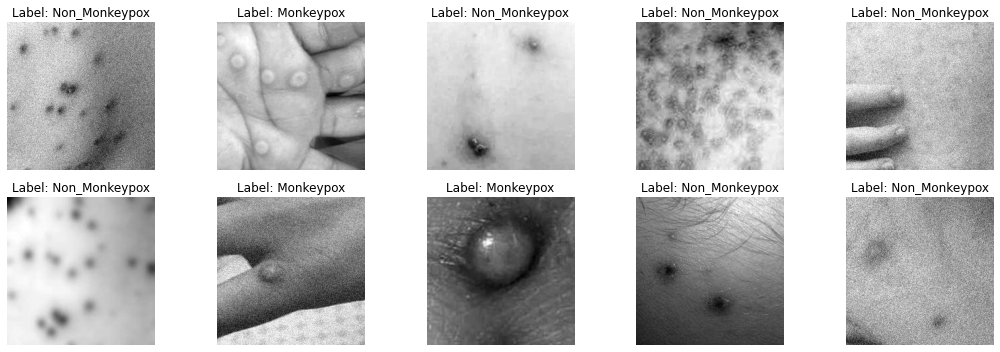

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {"Monkeypox" if label == 1 else "Non_Monkeypox"}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


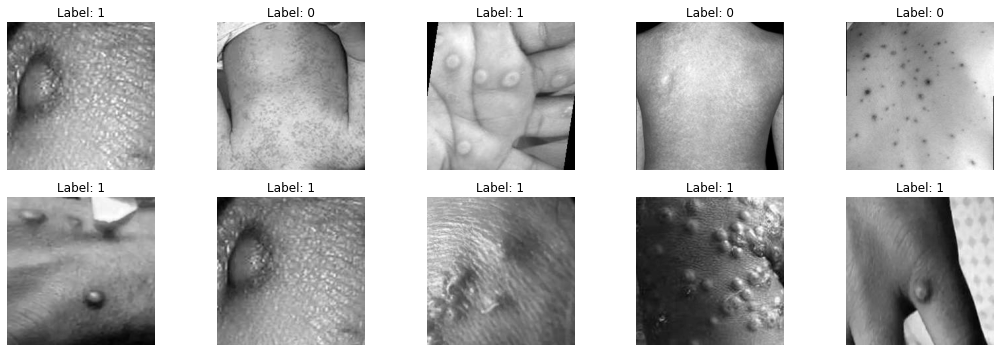

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


In [8]:
images[0]

array([[0.84705883, 0.8901961 , 0.7294118 , ..., 0.47058824, 0.54901963,
        0.60784316],
       [0.7019608 , 0.8666667 , 0.8       , ..., 0.69803923, 0.5254902 ,
        0.4       ],
       [0.69803923, 0.8745098 , 0.87058824, ..., 0.54901963, 0.6392157 ,
        0.44313726],
       ...,
       [0.49411765, 0.4627451 , 0.5529412 , ..., 0.7058824 , 0.6901961 ,
        0.6392157 ],
       [0.44705883, 0.35686275, 0.5372549 , ..., 0.7411765 , 0.654902  ,
        0.6509804 ],
       [0.5803922 , 0.6509804 , 0.43529412, ..., 0.7294118 , 0.68235296,
        0.6666667 ]], dtype=float32)

# VGG19

# DenseLayer

# 50 epochs

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5114 - auc: 0.5161 - auc_1: 0.5077 - false_negatives: 114.2258 - false_positives: 127.8710 - loss: 3.1421 - precision: 0.5027 - recall: 0.5425 - true_negatives: 124.7419 - true_positives: 144.1290 - val_accuracy: 0.6333 - val_auc: 0.7671 - val_auc_1: 0.7865 - val_false_negatives: 87.0000 - val_false_positives: 1.0000 - val_loss: 0.6638 - val_precision: 0.9688 - val_recall: 0.2627 - val_true_negatives: 121.0000 - val_true_positives: 31.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7084 - auc: 0.8076 - auc_1: 0.8336 - false_negatives: 86.7097 - false_positives: 51.0323 - loss: 0.5567 - precision: 0.7951 - recall: 0.6177 - true_negatives: 200.4194 - true_positives: 172.8065 - val_accuracy: 0.7667 - val_auc: 0.8666 - val_auc_1: 0.8744 - val_false_negatives: 29.0000 - val_false_positives: 27.0000 - val_loss: 0.4853 - val_precision: 0.7672 - val_recall: 0.7542 - val_true_negatives: 95.0000 - val_true_posit

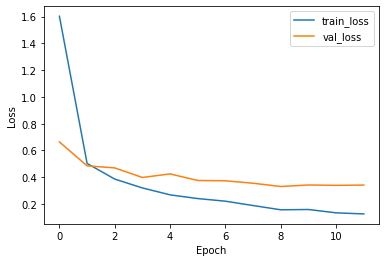

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8534 - auc: 0.9270 - auc_1: 0.9250 - false_negatives: 11.5556 - false_positives: 11.3333 - loss: 0.3396 - precision: 0.8349 - recall: 0.8325 - true_negatives: 71.1111 - true_positives: 58.8889
Test Accuracy: 84.58%
Precision: 0.85
Recall: 0.83
AUC-ROC: 0.93
AUC-PR: 0.94
TN: 105.0, FP: 17.0, FN: 20.0, TP: 98.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[105  17]
 [ 20  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       122
           1       0.85      0.83      0.84       118

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85
Precision: 0.85
Recall: 0.83
F1 Score: 0.84
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.69
Matthews Correlation Coefficient (MCC): 0.69
Balanced Accuracy: 0.85
Monkeypox Predictions: 47.92% (115/2

In [11]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match the expected input shape of VGG-19

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without including the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.4860 - auc_2: 0.4791 - auc_3: 0.4955 - false_negatives_1: 111.8064 - false_positives_1: 136.0968 - loss: 3.7429 - precision_1: 0.4964 - recall_1: 0.5590 - true_negatives_1: 116.8710 - true_positives_1: 146.1935 - val_accuracy: 0.6833 - val_auc_2: 0.8033 - val_auc_3: 0.8197 - val_false_negatives_1: 23.0000 - val_false_positives_1: 53.0000 - val_loss: 0.5635 - val_precision_1: 0.6419 - val_recall_1: 0.8051 - val_true_negatives_1: 69.0000 - val_true_positives_1: 95.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7501 - auc_2: 0.8410 - auc_3: 0.8800 - false_negatives_1: 60.7419 - false_positives_1: 65.7742 - loss: 0.5044 - precision_1: 0.7515 - recall_1: 0.7984 - true_negatives_1: 178.7097 - true_positives_1: 205.7419 - val_accuracy: 0.7792 - val_auc_2: 0.8827 - val_auc_3: 0.8883 - val_false_negatives_1: 22.0000 - val_false_positives_1: 31.0000 - val_loss: 0.4541 - val_precision_1: 0.7559 - val_recall_1:

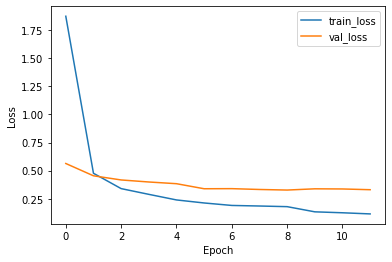

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8603 - auc_2: 0.9274 - auc_3: 0.9254 - false_negatives_1: 12.2222 - false_positives_1: 9.5556 - loss: 0.3328 - precision_1: 0.8533 - recall_1: 0.8248 - true_negatives_1: 72.8889 - true_positives_1: 58.2222
Test Accuracy: 85.42%
Precision: 0.87
Recall: 0.82
AUC-ROC: 0.93
AUC-PR: 0.94
TN: 108.0, FP: 14.0, FN: 21.0, TP: 97.0


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Confusion Matrix:
[[108  14]
 [ 21  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       122
           1       0.87      0.82      0.85       118

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.86      0.85      0.85       240

AUC Score: 0.85
Precision: 0.87
Recall: 0.82
F1 Score: 0.85
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.71
Matthews Correlation Coefficient (MCC): 0.71
Balanced Accuracy: 0.85
Monkeypox Predictions: 46.25% (111/240)
Non-Monkeypox Predictions: 53.75% (129/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 730.94 seconds


In [12]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match the expected input shape of VGG-19

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without including the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5913 - auc_4: 0.6006 - auc_5: 0.5873 - false_negatives_2: 96.8387 - false_positives_2: 111.6129 - loss: 2.6484 - precision_2: 0.5871 - recall_2: 0.6290 - true_negatives_2: 140.0000 - true_positives_2: 162.5161 - val_accuracy: 0.7042 - val_auc_4: 0.8188 - val_auc_5: 0.8378 - val_false_negatives_2: 19.0000 - val_false_positives_2: 52.0000 - val_loss: 0.5384 - val_precision_2: 0.6556 - val_recall_2: 0.8390 - val_true_negatives_2: 70.0000 - val_true_positives_2: 99.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8025 - auc_4: 0.8838 - auc_5: 0.8929 - false_negatives_2: 50.7097 - false_positives_2: 41.7097 - loss: 0.4412 - precision_2: 0.7995 - recall_2: 0.7860 - true_negatives_2: 217.2258 - true_positives_2: 201.3226 - val_accuracy: 0.7708 - val_auc_4: 0.8922 - val_auc_5: 0.8996 - val_false_negatives_2: 17.0000 - val_false_positives_2: 38.0000 - val_loss: 0.4419 - val_precision_2: 0.7266 - val_recall_2: 

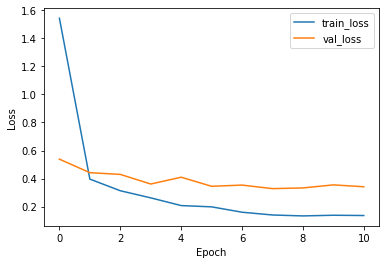

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8583 - auc_4: 0.9333 - auc_5: 0.9302 - false_negatives_2: 11.8889 - false_positives_2: 9.6667 - loss: 0.3243 - precision_2: 0.8459 - recall_2: 0.8277 - true_negatives_2: 72.7778 - true_positives_2: 58.5556
Test Accuracy: 85.83%
Precision: 0.88
Recall: 0.83
AUC-ROC: 0.93
AUC-PR: 0.94
TN: 108.0, FP: 14.0, FN: 20.0, TP: 98.0


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Confusion Matrix:
[[108  14]
 [ 20  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       122
           1       0.88      0.83      0.85       118

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240

AUC Score: 0.86
Precision: 0.88
Recall: 0.83
F1 Score: 0.85
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.72
Matthews Correlation Coefficient (MCC): 0.72
Balanced Accuracy: 0.86
Monkeypox Predictions: 46.67% (112/240)
Non-Monkeypox Predictions: 53.33% (128/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 668.66 seconds


In [13]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match the expected input shape of VGG-19

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without including the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Dense Layer+ DropOut + MaxPooling

# 50 epochs

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,034,305 (126.02 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5206 - auc_6: 0.5103 - auc_7: 0.5200 - false_negatives_3: 121.8710 - false_positives_3: 117.0323 - loss: 1.1487 - precision_3: 0.5275 - recall_3: 0.5176 - true_negatives_3: 136.9677 - true_positives_3: 135.0968 - val_accuracy: 0.4917 - val_auc_6: 0.7351 - val_auc_7: 0.7468 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 122.0000 - val_loss: 0.7789 - val_precision_3: 0.4917 - val_recall_3: 1.0000 - val_true_negatives_3: 0.0000e+00 - val_true_positives_3: 118.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6086 - auc_6: 0.6279 - auc_7: 0.6157 - false_negatives_3: 96.7097 - false_positives_3: 101.0323 - loss: 0.7423 - precision_3: 0.6157 - recall_3: 0.6442 - true_negatives_3: 151.4516 - true_positives_3: 161.7742 - val_accuracy: 0.7417 - val_auc_6: 0.8084 - val_auc_7: 0.8268 - val_false_negatives_3: 31.0000 - val_false_positives_3: 31.0000 - val_loss: 0.5330 - val_precision_3: 0.7373 - val_re

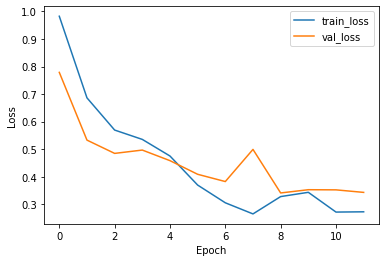

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8601 - auc_6: 0.9210 - auc_7: 0.9140 - false_negatives_3: 13.1111 - false_positives_3: 8.3333 - loss: 0.3500 - precision_3: 0.8666 - recall_3: 0.8057 - true_negatives_3: 74.1111 - true_positives_3: 57.3333
Test Accuracy: 85.42%
Precision: 0.89
Recall: 0.81
AUC-ROC: 0.93
AUC-PR: 0.93
TN: 110.0, FP: 12.0, FN: 23.0, TP: 95.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[110  12]
 [ 23  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       122
           1       0.89      0.81      0.84       118

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.86      0.85      0.85       240

AUC Score: 0.85
Precision: 0.89
Recall: 0.81
F1 Score: 0.84
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.71
Matthews Correlation Coefficient (MCC): 0.71
Balanced Accuracy: 0.85
Monkeypox Predictions: 

In [14]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,034,305 (126.02 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5195 - auc_8: 0.5003 - auc_9: 0.5007 - false_negatives_4: 113.3226 - false_positives_4: 133.9355 - loss: 1.3720 - precision_4: 0.5187 - recall_4: 0.5759 - true_negatives_4: 121.9677 - true_positives_4: 141.7419 - val_accuracy: 0.6000 - val_auc_8: 0.6870 - val_auc_9: 0.7018 - val_false_negatives_4: 88.0000 - val_false_positives_4: 8.0000 - val_loss: 0.6637 - val_precision_4: 0.7895 - val_recall_4: 0.2542 - val_true_negatives_4: 114.0000 - val_true_positives_4: 30.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5418 - auc_8: 0.5553 - auc_9: 0.5622 - false_negatives_4: 110.3548 - false_positives_4: 119.6129 - loss: 0.7430 - precision_4: 0.5536 - recall_4: 0.5773 - true_negatives_4: 130.7419 - true_positives_4: 150.2581 - val_accuracy: 0.5208 - val_auc_8: 0.7580 - val_auc_9: 0.7806 - val_false_negatives_4: 115.0000 - val_false_positives_4: 0.0000e+00 - val_loss: 0.7849 - val_precision_4: 1.0000 - val_rec

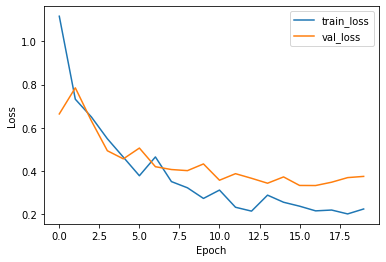

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8872 - auc_8: 0.9277 - auc_9: 0.9285 - false_negatives_4: 8.8889 - false_positives_4: 8.3333 - loss: 0.3408 - precision_4: 0.8780 - recall_4: 0.8618 - true_negatives_4: 74.1111 - true_positives_4: 61.5556
Test Accuracy: 88.33%
Precision: 0.89
Recall: 0.87
AUC-ROC: 0.93
AUC-PR: 0.94
TN: 109.0, FP: 13.0, FN: 15.0, TP: 103.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[109  13]
 [ 15 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       122
           1       0.89      0.87      0.88       118

    accuracy                           0.88       240
   macro avg       0.88      0.88      0.88       240
weighted avg       0.88      0.88      0.88       240

AUC Score: 0.88
Precision: 0.89
Recall: 0.87
F1 Score: 0.88
PR AUC: 0.91
Cohen's Kappa Coefficient: 0.77
Matthews Correlation Coefficient (MCC): 0.77
Balanced Accuracy: 0.88
Monkeypox Predictions: 

In [15]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,034,305 (126.02 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5330 - auc_10: 0.5442 - auc_11: 0.5340 - false_negatives_5: 117.5161 - false_positives_5: 124.6774 - loss: 1.3138 - precision_5: 0.5292 - recall_5: 0.5476 - true_negatives_5: 131.0000 - true_positives_5: 137.7742 - val_accuracy: 0.5875 - val_auc_10: 0.7100 - val_auc_11: 0.7464 - val_false_negatives_5: 8.0000 - val_false_positives_5: 91.0000 - val_loss: 0.6582 - val_precision_5: 0.5473 - val_recall_5: 0.9322 - val_true_negatives_5: 31.0000 - val_true_positives_5: 110.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5425 - auc_10: 0.5739 - auc_11: 0.5525 - false_negatives_5: 120.1936 - false_positives_5: 114.5806 - loss: 0.7915 - precision_5: 0.5363 - recall_5: 0.5057 - true_negatives_5: 141.2581 - true_positives_5: 134.9355 - val_accuracy: 0.6875 - val_auc_10: 0.7682 - val_auc_11: 0.7835 - val_false_negatives_5: 51.0000 - val_false_positives_5: 24.0000 - val_loss: 0.6235 - val_precision_5: 0.7363 - val

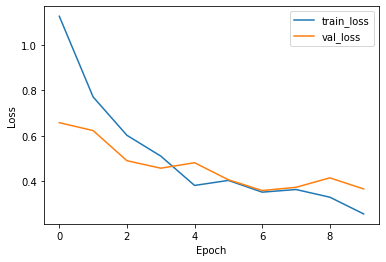

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8208 - auc_10: 0.9154 - auc_11: 0.9063 - false_negatives_5: 13.1111 - false_positives_5: 14.1111 - loss: 0.3770 - precision_5: 0.7907 - recall_5: 0.8057 - true_negatives_5: 68.3333 - true_positives_5: 57.3333
Test Accuracy: 82.08%
Precision: 0.83
Recall: 0.81
AUC-ROC: 0.92
AUC-PR: 0.93
TN: 102.0, FP: 20.0, FN: 23.0, TP: 95.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[102  20]
 [ 23  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       122
           1       0.83      0.81      0.82       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

AUC Score: 0.82
Precision: 0.83
Recall: 0.81
F1 Score: 0.82
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.64
Matthews Correlation Coefficient (MCC): 0.64
Balanced Accuracy: 0.82
Monkeypox Prediction

In [16]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# GlobalAveragePooling2D

# 50 epochs

In [17]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with GlobalAveragePooling2D
model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model
model.save('vgg19_model_with_gavgpool_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg19_model_metrics.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,451,393 (78.02 MB)

 Trainable params: 427,009 (1.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5285 - auc_12: 0.5116 - auc_13: 0.5463 - false_negatives_6: 111.5161 - false_positives_6: 128.7419 - loss: 0.7441 - precision_6: 0.5303 - recall_6: 0.5505 - true_negatives_6: 117.9032 - true_positives_6: 152.8065 - val_accuracy: 0.5083 - val_auc_12: 0.6403 - val_auc_13: 0.6877 - val_false_negatives_6: 118.0000 - val_false_positives_6: 0.0000e+00 - val_loss: 0.7194 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_true_negatives_6: 122.0000 - val_true_positives_6: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5570 - auc_12: 0.5869 - auc_13: 0.5680 - false_negatives_6: 132.2258 - false_positives_6: 92.6774 - loss: 0.6859 - precision_6: 0.5461 - recall_6: 0.3966 - true_negatives_6: 167.8710 - true_positives_6: 118.1936 - val_accuracy: 0.5417 - val_auc_12: 0.6399 - val_auc_13: 0.6808 - val_false_negatives_6: 7.0000 - val_false_positives_6: 103.0000 - val_loss: 0.6841 - val_precision_6:

Confusion Matrix:
[[103  19]
 [ 28  90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       122
           1       0.83      0.76      0.79       118

    accuracy                           0.80       240
   macro avg       0.81      0.80      0.80       240
weighted avg       0.81      0.80      0.80       240

AUC Score: 0.80
Precision: 0.83
Recall: 0.76
F1 Score: 0.79
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.61
Matthews Correlation Coefficient (MCC): 0.61
Balanced Accuracy: 0.80
Monkeypox Predictions: 45.42% (109/240)
Non-Monkeypox Predictions: 54.58% (131/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 1269.44 seconds


# 150 epochs

In [18]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with GlobalAveragePooling2D
model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model
model.save('vgg19_model_with_gavgpool_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg19_model_metrics.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,451,393 (78.02 MB)

 Trainable params: 427,009 (1.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4933 - auc_14: 0.4943 - auc_15: 0.4901 - false_negatives_7: 130.8387 - false_positives_7: 122.2258 - loss: 0.7295 - precision_7: 0.4827 - recall_7: 0.4526 - true_negatives_7: 133.1935 - true_positives_7: 124.7097 - val_accuracy: 0.4958 - val_auc_14: 0.6134 - val_auc_15: 0.6552 - val_false_negatives_7: 1.0000 - val_false_positives_7: 120.0000 - val_loss: 0.6886 - val_precision_7: 0.4937 - val_recall_7: 0.9915 - val_true_negatives_7: 2.0000 - val_true_positives_7: 117.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5508 - auc_14: 0.5409 - auc_15: 0.5469 - false_negatives_7: 89.7097 - false_positives_7: 137.8387 - loss: 0.7001 - precision_7: 0.5484 - recall_7: 0.6752 - true_negatives_7: 113.3226 - true_positives_7: 170.0968 - val_accuracy: 0.5833 - val_auc_14: 0.6463 - val_auc_15: 0.6935 - val_false_negatives_7: 71.0000 - val_false_positives_7: 29.0000 - val_loss: 0.6598 - val_precision_7: 0.6184 - val_

30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8357 - auc_14: 0.9118 - auc_15: 0.9231 - false_negatives_7: 51.4194 - false_positives_7: 34.1613 - loss: 0.3729 - precision_7: 0.8649 - recall_7: 0.7970 - true_negatives_7: 219.1290 - true_positives_7: 206.2581 - val_accuracy: 0.8167 - val_auc_14: 0.8848 - val_auc_15: 0.8901 - val_false_negatives_7: 22.0000 - val_false_positives_7: 22.0000 - val_loss: 0.4283 - val_precision_7: 0.8136 - val_recall_7: 0.8136 - val_true_negatives_7: 100.0000 - val_true_positives_7: 96.0000
Epoch 30/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8343 - auc_14: 0.9099 - auc_15: 0.9227 - false_negatives_7: 47.2903 - false_positives_7: 36.7097 - loss: 0.3758 - precision_7: 0.8577 - recall_7: 0.8204 - true_negatives_7: 212.7419 - true_positives_7: 214.2258 - val_accuracy: 0.8292 - val_auc_14: 0.8993 - val_auc_15: 0.9022 - val_false_negatives_7: 30.0000 - val_false_positives_7: 11.0000 - val_loss: 0.4157 - val_precision_7: 0.8889 - val_recall_7: 0.7

Confusion Matrix:
[[111  11]
 [ 30  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       122
           1       0.89      0.75      0.81       118

    accuracy                           0.83       240
   macro avg       0.84      0.83      0.83       240
weighted avg       0.84      0.83      0.83       240

AUC Score: 0.83
Precision: 0.89
Recall: 0.75
F1 Score: 0.81
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.66
Matthews Correlation Coefficient (MCC): 0.67
Balanced Accuracy: 0.83
Monkeypox Predictions: 41.25% (99/240)
Non-Monkeypox Predictions: 58.75% (141/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 1883.99 seconds


# 200 epochs

In [9]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with GlobalAveragePooling2D
model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model
model.save('vgg19_model_with_gavgpool_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg19_model_metrics.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


2024-09-28 12:09:27.103975: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-28 12:09:27.216096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 12:09:27.261791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 12:09:27.276325: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 12:09:27.363539: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,451,393 (78.02 MB)

 Trainable params: 427,009 (1.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4899 - auc: 0.4726 - auc_1: 0.4732 - false_negatives: 123.2903 - false_positives: 134.5806 - loss: 0.7541 - precision: 0.4981 - recall: 0.4776 - true_negatives: 121.9032 - true_positives: 131.1935 - val_accuracy: 0.5708 - val_auc: 0.6157 - val_auc_1: 0.6150 - val_false_negatives: 29.0000 - val_false_positives: 74.0000 - val_loss: 0.6812 - val_precision: 0.5460 - val_recall: 0.7542 - val_true_negatives: 48.0000 - val_true_positives: 89.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5285 - auc: 0.5485 - auc_1: 0.5535 - false_negatives: 120.7097 - false_positives: 114.0968 - loss: 0.6916 - precision: 0.5308 - recall: 0.5341 - true_negatives: 144.8387 - true_positives: 131.3226 - val_accuracy: 0.5417 - val_auc: 0.6361 - val_auc_1: 0.6415 - val_false_negatives: 3.0000 - val_false_positives: 107.0000 - val_loss: 0.6955 - val_precision: 0.5180 - val_recall: 0.9746 - val_true_negatives: 15.0000 - val_true_p

30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8440 - auc: 0.9172 - auc_1: 0.9252 - false_negatives: 50.5161 - false_positives: 34.1936 - loss: 0.3594 - precision: 0.8643 - recall: 0.8083 - true_negatives: 223.6452 - true_positives: 202.6129 - val_accuracy: 0.8208 - val_auc: 0.8901 - val_auc_1: 0.8933 - val_false_negatives: 26.0000 - val_false_positives: 17.0000 - val_loss: 0.4289 - val_precision: 0.8440 - val_recall: 0.7797 - val_true_negatives: 105.0000 - val_true_positives: 92.0000
Epoch 32/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8591 - auc: 0.9226 - auc_1: 0.9373 - false_negatives: 48.1936 - false_positives: 28.6774 - loss: 0.3438 - precision: 0.8944 - recall: 0.8196 - true_negatives: 224.5161 - true_positives: 209.5806 - val_accuracy: 0.7583 - val_auc: 0.8819 - val_auc_1: 0.8843 - val_false_negatives: 9.0000 - val_false_positives: 49.0000 - val_loss: 0.5889 - val_precision: 0.6899 - val_recall: 0.9237 - val_true_negatives: 73.0000 - val_true_positives: 109.0

Confusion Matrix:
[[ 93  29]
 [ 17 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       122
           1       0.78      0.86      0.81       118

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240

AUC Score: 0.81
Precision: 0.78
Recall: 0.86
F1 Score: 0.81
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.62
Matthews Correlation Coefficient (MCC): 0.62
Balanced Accuracy: 0.81
Monkeypox Predictions: 54.17% (130/240)
Non-Monkeypox Predictions: 45.83% (110/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Time taken: 2065.41 seconds


# Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers

# 50 epochs

In [10]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with Conv2D, GlobalAveragePooling2D, Dropout, and Dense layers
model = Sequential([
    vgg_base,
    Conv2D(256, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model
model.save('vgg19_model_with_conv_gap_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg19_model_metrics_with_conv_gap_dropout_dense.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,467,457 (81.89 MB)

 Trainable params: 1,443,073 (5.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5443 - auc_2: 0.5403 - auc_3: 0.5419 - false_negatives_1: 113.7097 - false_positives_1: 121.3871 - loss: 0.8138 - precision_1: 0.5581 - recall_1: 0.5774 - true_negatives_1: 129.3871 - true_positives_1: 146.4839 - val_accuracy: 0.5917 - val_auc_2: 0.6616 - val_auc_3: 0.6703 - val_false_negatives_1: 67.0000 - val_false_positives_1: 31.0000 - val_loss: 0.6743 - val_precision_1: 0.6220 - val_recall_1: 0.4322 - val_true_negatives_1: 91.0000 - val_true_positives_1: 51.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5595 - auc_2: 0.5910 - auc_3: 0.5910 - false_negatives_1: 120.5806 - false_positives_1: 97.7097 - loss: 0.6853 - precision_1: 0.5860 - recall_1: 0.5092 - true_negatives_1: 152.7742 - true_positives_1: 139.9032 - val_accuracy: 0.5958 - val_auc_2: 0.6957 - val_auc_3: 0.7180 - val_false_negatives_1: 20.0000 - val_false_positives_1: 77.0000 - val_loss: 0.6577 - val_precision_1: 0.5600 - val_recall_1: 

Confusion Matrix:
[[111  11]
 [ 25  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       122
           1       0.89      0.79      0.84       118

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85
Precision: 0.89
Recall: 0.79
F1 Score: 0.84
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Monkeypox Predictions: 43.33% (104/240)
Non-Monkeypox Predictions: 56.67% (136/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 1440.56 seconds


# 150 epochs

In [11]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with Conv2D, GlobalAveragePooling2D, Dropout, and Dense layers
model = Sequential([
    vgg_base,
    Conv2D(256, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model
model.save('vgg19_model_with_conv_gap_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg19_model_metrics_with_conv_gap_dropout_dense.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 5, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,467,457 (81.89 MB)

 Trainable params: 1,443,073 (5.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5373 - auc_4: 0.5510 - auc_5: 0.5527 - false_negatives_2: 117.3226 - false_positives_2: 121.5484 - loss: 0.7582 - precision_2: 0.5416 - recall_2: 0.5405 - true_negatives_2: 130.8065 - true_positives_2: 141.2903 - val_accuracy: 0.5708 - val_auc_4: 0.6813 - val_auc_5: 0.7080 - val_false_negatives_2: 102.0000 - val_false_positives_2: 1.0000 - val_loss: 0.6745 - val_precision_2: 0.9412 - val_recall_2: 0.1356 - val_true_negatives_2: 121.0000 - val_true_positives_2: 16.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5739 - auc_4: 0.5969 - auc_5: 0.5887 - false_negatives_2: 118.7097 - false_positives_2: 96.0000 - loss: 0.6839 - precision_2: 0.5822 - recall_2: 0.5176 - true_negatives_2: 162.1613 - true_positives_2: 134.0968 - val_accuracy: 0.6417 - val_auc_4: 0.7062 - val_auc_5: 0.7293 - val_false_negatives_2: 37.0000 - val_false_positives_2: 49.0000 - val_loss: 0.6301 - val_precision_2: 0.6231 - val_recall_

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


Confusion Matrix:
[[109  13]
 [ 30  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.84       122
           1       0.87      0.75      0.80       118

    accuracy                           0.82       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.83      0.82      0.82       240

AUC Score: 0.82
Precision: 0.87
Recall: 0.75
F1 Score: 0.80
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.64
Matthews Correlation Coefficient (MCC): 0.65
Balanced Accuracy: 0.82
Monkeypox Predictions: 42.08% (101/240)
Non-Monkeypox Predictions: 57.92% (139/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 874.32 seconds


# 200 epochs

In [12]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with Conv2D, GlobalAveragePooling2D, Dropout, and Dense layers
model = Sequential([
    vgg_base,
    Conv2D(256, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model
model.save('vgg19_model_with_conv_gap_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg19_model_metrics_with_conv_gap_dropout_dense.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,467,457 (81.89 MB)

 Trainable params: 1,443,073 (5.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5076 - auc_6: 0.5105 - auc_7: 0.5051 - false_negatives_3: 119.2581 - false_positives_3: 126.3871 - loss: 0.7677 - precision_3: 0.4892 - recall_3: 0.4948 - true_negatives_3: 130.0968 - true_positives_3: 135.2258 - val_accuracy: 0.4917 - val_auc_6: 0.6568 - val_auc_7: 0.6661 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 122.0000 - val_loss: 0.6943 - val_precision_3: 0.4917 - val_recall_3: 1.0000 - val_true_negatives_3: 0.0000e+00 - val_true_positives_3: 118.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5666 - auc_6: 0.5845 - auc_7: 0.5508 - false_negatives_3: 117.1936 - false_positives_3: 105.8387 - loss: 0.7059 - precision_3: 0.5450 - recall_3: 0.5319 - true_negatives_3: 153.4516 - true_positives_3: 134.4839 - val_accuracy: 0.6292 - val_auc_6: 0.6858 - val_auc_7: 0.7102 - val_false_negatives_3: 23.0000 - val_false_positives_3: 66.0000 - val_loss: 0.6505 - val_precision_3: 0.5901 - val

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


Confusion Matrix:
[[110  12]
 [ 31  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       122
           1       0.88      0.74      0.80       118

    accuracy                           0.82       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.83      0.82      0.82       240

AUC Score: 0.82
Precision: 0.88
Recall: 0.74
F1 Score: 0.80
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.64
Matthews Correlation Coefficient (MCC): 0.65
Balanced Accuracy: 0.82
Monkeypox Predictions: 41.25% (99/240)
Non-Monkeypox Predictions: 58.75% (141/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 874.80 seconds


# LSTM + DenseLayers

# 50 epochs

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 3584)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     1,901,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,933,761 (83.67 MB)

 Trainable params: 1,909,377 (7.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5579 - loss: 0.7037 - val_accuracy: 0.5667 - val_loss: 0.6662
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6686 - loss: 0.6180 - val_accuracy: 0.7000 - val_loss: 0.5682
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7425 - loss: 0.5196 - val_accuracy: 0.6208 - val_loss: 0.6101
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7078 - loss: 0.5175 - val_accuracy: 0.7958 - val_loss: 0.4460
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8371 - loss: 0.3940 - val_accuracy: 0.7958 - val_loss: 0.4465
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8929 - loss: 0.3096 - val_accuracy: 0.7250 - val_loss: 0.5868
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8853 - loss: 0.2936 - val_accuracy: 0.8417 - val_loss: 0.3891
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8987 - loss: 0.2374 - val_accuracy: 0.8167 - val_loss:

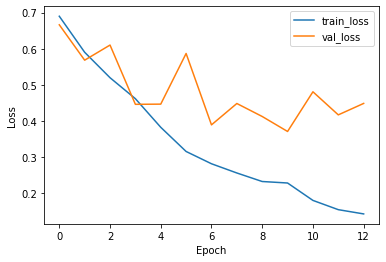

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8574 - loss: 0.3297
Test Accuracy: 85.00%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[111  11]
 [ 25  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       122
           1       0.89      0.79      0.84       118

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85

Precision: 0.8942307692307693
Recall: 0.788135593220339
F1 Score: 0.8378378378378378
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Monkeypox Predictions: 43.33% (104/240)
Non-Monkeypox Predictions: 56.67% (136/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 760.27 seconds


In [13]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score)
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with LSTM and Dense layers
model = Sequential([
    vgg_base,
    Flatten(),
    Reshape((7, 7*512)),  # Reshape to match LSTM input shape
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model predictions to CSV
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})
predictions_df.to_csv('vgg19_lstm_predictions.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 3584)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     1,901,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,933,761 (83.67 MB)

 Trainable params: 1,909,377 (7.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5344 - loss: 0.7640 - val_accuracy: 0.5417 - val_loss: 0.6812
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5996 - loss: 0.6505 - val_accuracy: 0.6417 - val_loss: 0.6226
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7066 - loss: 0.5802 - val_accuracy: 0.7042 - val_loss: 0.5500
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8350 - loss: 0.4412 - val_accuracy: 0.7333 - val_loss: 0.5078
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8038 - loss: 0.4228 - val_accuracy: 0.8208 - val_loss: 0.4224
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8860 - loss: 0.3000 - val_accuracy: 0.7458 - val_loss: 0.4798
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8627 - loss: 0.2876 - val_accuracy: 0.8000 - val_loss: 0.4042
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9169 - loss: 0.2115 - val_accuracy: 0.7250 - v

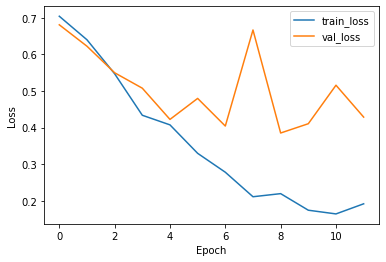

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8467 - loss: 0.3690
Test Accuracy: 83.75%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[ 99  23]
 [ 16 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       122
           1       0.82      0.86      0.84       118

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240

AUC Score: 0.84

Precision: 0.816
Recall: 0.864406779661017
F1 Score: 0.8395061728395061
Cohen's Kappa Coefficient: 0.68
Matthews Correlation Coefficient (MCC): 0.68
Balanced Accuracy: 0.84
Monkeypox Predictions: 52.08% (125/240)
Non-Monkeypox Predictions: 47.92% (115/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Time taken: 702.84 seconds


In [14]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score)
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with LSTM and Dense layers
model = Sequential([
    vgg_base,
    Flatten(),
    Reshape((7, 7*512)),  # Reshape to match LSTM input shape
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model predictions to CSV
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})
predictions_df.to_csv('vgg19_lstm_predictions.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 3584)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │     1,901,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,933,761 (83.67 MB)

 Trainable params: 1,909,377 (7.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5195 - loss: 0.7110 - val_accuracy: 0.6250 - val_loss: 0.6398
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6965 - loss: 0.5752 - val_accuracy: 0.7458 - val_loss: 0.5243
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7874 - loss: 0.4699 - val_accuracy: 0.7042 - val_loss: 0.5928
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7560 - loss: 0.4937 - val_accuracy: 0.8000 - val_loss: 0.4418
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8404 - loss: 0.3465 - val_accuracy: 0.7500 - val_loss: 0.5060
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8556 - loss: 0.3150 - val_accuracy: 0.8083 - val_loss: 0.3912
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9123 - loss: 0.2402 - val_accuracy: 0.7667 - val_loss: 0.4275
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9175 - loss: 0.2239 - val_accuracy: 0.8417 - v

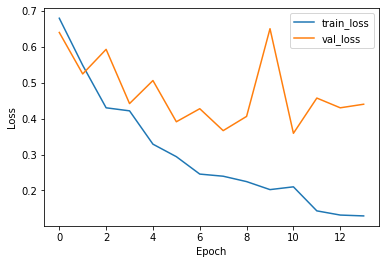

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8579 - loss: 0.3525
Test Accuracy: 85.00%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[106  16]
 [ 20  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       122
           1       0.86      0.83      0.84       118

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85

Precision: 0.8596491228070176
Recall: 0.8305084745762712
F1 Score: 0.8448275862068966
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Monkeypox Predictions: 47.50% (114/240)
Non-Monkeypox Predictions: 52.50% (126/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Time taken: 817.24 seconds


In [15]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score)
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG19 model without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG19 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG19 base with LSTM and Dense layers
model = Sequential([
    vgg_base,
    Flatten(),
    Reshape((7, 7*512)),  # Reshape to match LSTM input shape
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Save the model predictions to CSV
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})
predictions_df.to_csv('vgg19_lstm_predictions.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# MixUP Augmentation

# 50 epochs

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.2367 - auc_8: 0.4991 - auc_9: 0.7814 - loss: 2.9723 - precision_4: 0.7838 - recall_4: 0.4913 - val_accuracy: 0.6667 - val_auc_8: 0.7599 - val_auc_9: 0.7779 - val_loss: 0.5932 - val_precision_4: 0.6267 - val_recall_4: 0.7966
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3468 - auc_8: 0.6708 - auc_9: 0.8380 - loss: 0.6332 - precision_4: 0.8256 - recall_4: 0.6059 - val_accuracy: 0.6833 - val_auc_8: 0.8476 - val_auc_9: 0.8588 - val_loss: 0.5710 - val_precision_4: 0.6180 - val_recall_4: 0.9322
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3717 - auc_8: 0.7425 - auc_9: 0.9055 - loss: 0.5410 - precision_4: 0.8755 - recall_4: 0.6111 - val_accuracy: 0.7333 - val_auc_8: 0.8933 - val_auc_9: 0.8958 - val_loss: 0.5151 - val_precision_4: 0.9355 - val_recall_4: 0.4915
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3779 - auc_8: 0.7154 - auc_9: 0.8838 - loss: 0.5076 - precision_4: 0.904

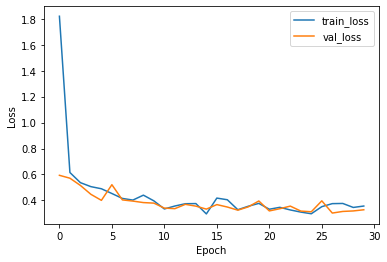

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8935 - auc_8: 0.9371 - auc_9: 0.9322 - loss: 0.3089 - precision_4: 0.9042 - recall_4: 0.8466
Test Accuracy: 88.75%
Precision: 0.91
Recall: 0.86
AUC-ROC: 0.94
AUC-PR: 0.95
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[112  10]
 [ 17 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       122
           1       0.91      0.86      0.88       118

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240

AUC Score: 0.89
Precision: 0.91
Recall: 0.86
F1 Score: 0.88
PR AUC: 0.92
Cohen's Kappa Coefficient: 0.77
Matthews Correlation Coefficient (MCC): 0.78
Balanced Accuracy: 0.89
Time taken: 1764.88 seconds
Monkeypox Predictions: 46.25% (111/240)
Non-Monkeypox Predictions: 53.75% (129/240)
The model predicted more non-Monkeypox cases than Monkeypox case

In [16]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Function for Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha <= 0:
        return x, y
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y

# Custom generator for Mixup
class MixupDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size=32, alpha=0.2):
        self.x = x
        self.y = y
        self.batch_size = batch_size
        self.alpha = alpha
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, idx):
        batch_indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = self.x[batch_indexes]
        batch_y = self.y[batch_indexes]

        # Apply Mixup augmentation
        mixed_x, mixed_y = mixup_data(batch_x, batch_y, alpha=self.alpha)

        return mixed_x, mixed_y

# Instantiate the data generator
train_generator = MixupDataGenerator(X_train_resized, y_train, batch_size=32, alpha=0.2)

# Train the model with early stopping and Mixup data generator
history = model.fit(train_generator, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

2024-10-15 12:05:57.644779: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 12:05:57.761582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 12:05:57.807441: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 12:05:57.821896: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 12:05:57.909672: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2497 - auc: 0.4782 - auc_1: 0.7210 - loss: 3.0711 - precision: 0.7160 - recall: 0.4805 - val_accuracy: 0.7375 - val_auc: 0.8196 - val_auc_1: 0.8120 - val_loss: 0.5574 - val_precision: 0.6846 - val_recall: 0.8644
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3704 - auc: 0.6716 - auc_1: 0.8617 - loss: 0.5948 - precision: 0.8305 - recall: 0.5449 - val_accuracy: 0.7542 - val_auc: 0.8718 - val_auc_1: 0.8774 - val_loss: 0.5157 - val_precision: 0.7063 - val_recall: 0.8559
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3959 - auc: 0.7355 - auc_1: 0.8708 - loss: 0.5134 - precision: 0.8502 - recall: 0.5494 - val_accuracy: 0.8083 - val_auc: 0.8904 - val_auc_1: 0.8927 - val_loss: 0.4627 - val_precision: 0.8750 - val_recall: 0.7119
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4406 - auc: 0.7940 - auc_1: 0.9148 - loss: 0.4505 - precision: 0.9181 - recall: 0.5410 - val_accuracy: 0

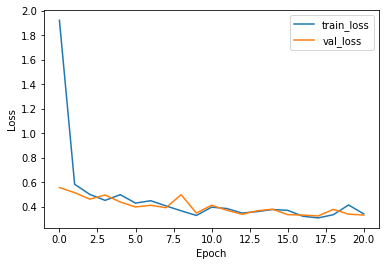

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8473 - auc: 0.9287 - auc_1: 0.9237 - loss: 0.3423 - precision: 0.8208 - recall: 0.8360
Test Accuracy: 85.00%
Precision: 0.85
Recall: 0.85
AUC-ROC: 0.94
AUC-PR: 0.94
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[104  18]
 [ 18 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       122
           1       0.85      0.85      0.85       118

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Time taken: 1231.18 seconds
Monkeypox Predictions: 49.17% (118/240)
Non-Monkeypox Predictions: 50.83% (122/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Tot

In [9]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Function for Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha <= 0:
        return x, y
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y

# Custom generator for Mixup
class MixupDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size=32, alpha=0.2):
        self.x = x
        self.y = y
        self.batch_size = batch_size
        self.alpha = alpha
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, idx):
        batch_indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = self.x[batch_indexes]
        batch_y = self.y[batch_indexes]

        # Apply Mixup augmentation
        mixed_x, mixed_y = mixup_data(batch_x, batch_y, alpha=self.alpha)

        return mixed_x, mixed_y

# Instantiate the data generator
train_generator = MixupDataGenerator(X_train_resized, y_train, batch_size=32, alpha=0.2)

# Train the model with early stopping and Mixup data generator
history = model.fit(train_generator, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.2441 - auc_2: 0.4837 - auc_3: 0.7308 - loss: 2.5012 - precision_1: 0.7227 - recall_1: 0.4846 - val_accuracy: 0.7417 - val_auc_2: 0.8504 - val_auc_3: 0.8524 - val_loss: 0.5222 - val_precision_1: 0.6750 - val_recall_1: 0.9153
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3552 - auc_2: 0.6821 - auc_3: 0.8687 - loss: 0.6633 - precision_1: 0.8482 - recall_1: 0.6242 - val_accuracy: 0.7083 - val_auc_2: 0.8855 - val_auc_3: 0.8917 - val_loss: 0.5393 - val_precision_1: 0.6364 - val_recall_1: 0.9492
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4300 - auc_2: 0.7610 - auc_3: 0.9040 - loss: 0.4577 - precision_1: 0.8766 - recall_1: 0.6522 - val_accuracy: 0.8208 - val_auc_2: 0.9034 - val_auc_3: 0.9106 - val_loss: 0.4394 - val_precision_1: 0.9310 - val_recall_1: 0.6864
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4607 - auc_2: 0.7914 - auc_3: 0.9226 - loss: 0.3963 - precision_1: 0

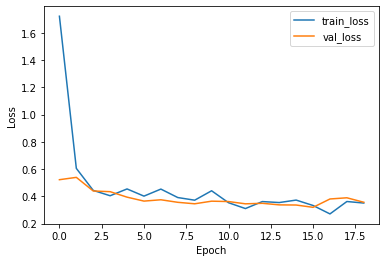

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8600 - auc_2: 0.9280 - auc_3: 0.9219 - loss: 0.3325 - precision_1: 0.8530 - recall_1: 0.8245
Test Accuracy: 85.00%
Precision: 0.87
Recall: 0.82
AUC-ROC: 0.94
AUC-PR: 0.94
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[107  15]
 [ 21  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       122
           1       0.87      0.82      0.84       118

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85
Precision: 0.87
Recall: 0.82
F1 Score: 0.84
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Time taken: 1127.06 seconds
Monkeypox Predictions: 46.67% (112/240)
Non-Monkeypox Predictions: 53.33% (128/240)
The model predicted more non-Monkeypox cases than Monkeypox case

In [10]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Function for Mixup augmentation
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha <= 0:
        return x, y
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y

# Custom generator for Mixup
class MixupDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size=32, alpha=0.2):
        self.x = x
        self.y = y
        self.batch_size = batch_size
        self.alpha = alpha
        self.indexes = np.arange(len(self.x))

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, idx):
        batch_indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = self.x[batch_indexes]
        batch_y = self.y[batch_indexes]

        # Apply Mixup augmentation
        mixed_x, mixed_y = mixup_data(batch_x, batch_y, alpha=self.alpha)

        return mixed_x, mixed_y

# Instantiate the data generator
train_generator = MixupDataGenerator(X_train_resized, y_train, batch_size=32, alpha=0.2)

# Train the model with early stopping and Mixup data generator
history = model.fit(train_generator, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# DenseNet Blocks

# 50 epochs

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5256 - auc_4: 0.5283 - auc_5: 0.5039 - loss: 2.4548 - precision_2: 0.5051 - recall_2: 0.4931 - val_accuracy: 0.7500 - val_auc_4: 0.8403 - val_auc_5: 0.8511 - val_loss: 0.4874 - val_precision_2: 0.7417 - val_recall_2: 0.7542
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7415 - auc_4: 0.8229 - auc_5: 0.8484 - loss: 0.5254 - precision_2: 0.7503 - recall_2: 0.7287 - val_accuracy: 0.8125 - val_auc_4: 0.8923 - val_auc_5: 0.9018 - val_loss: 0.4238 - val_precision_2: 0.8842 - val_recall_2: 0.7119
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8196 - auc_4: 0.9140 - auc_5: 0.9218 - loss: 0.3755 - precision_2: 0.8576 - recall_2: 0.7681 - val_accuracy: 0.8125 - val_auc_4: 0.9125 - val_auc_5: 0.9207 - val_loss: 0.3763 - val_precision_2: 0.8120 - val_recall_2: 0.8051
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8712 - auc_4: 0.9321 - auc_5: 0.9422 - loss: 0.3391 - precision_2: 0.888

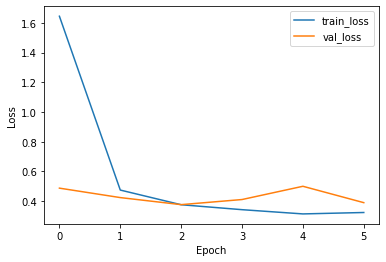

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8093 - auc_4: 0.9081 - auc_5: 0.9029 - loss: 0.3872 - precision_2: 0.7746 - recall_2: 0.7998
Test Accuracy: 81.25%
Precision: 0.81
Recall: 0.81
AUC-ROC: 0.91
AUC-PR: 0.92
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[100  22]
 [ 23  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       122
           1       0.81      0.81      0.81       118

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240

AUC Score: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.62
Matthews Correlation Coefficient (MCC): 0.62
Balanced Accuracy: 0.81
Time taken: 371.83 seconds
Monkeypox Predictions: 48.75% (117/240)
Non-Monkeypox Predictions: 51.25% (123/240)
The model predicted more non-Monkeypox cases than Monkeypox cases

In [11]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.4954 - auc_6: 0.5160 - auc_7: 0.5403 - loss: 3.4260 - precision_3: 0.5170 - recall_3: 0.5241 - val_accuracy: 0.6583 - val_auc_6: 0.7696 - val_auc_7: 0.7877 - val_loss: 0.5870 - val_precision_3: 0.7500 - val_recall_3: 0.4576
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7095 - auc_6: 0.7801 - auc_7: 0.7899 - loss: 0.5653 - precision_3: 0.7123 - recall_3: 0.6892 - val_accuracy: 0.7625 - val_auc_6: 0.8581 - val_auc_7: 0.8620 - val_loss: 0.5110 - val_precision_3: 0.8144 - val_recall_3: 0.6695
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7672 - auc_6: 0.8611 - auc_7: 0.8789 - loss: 0.4772 - precision_3: 0.7588 - recall_3: 0.8132 - val_accuracy: 0.7792 - val_auc_6: 0.8809 - val_auc_7: 0.8861 - val_loss: 0.4568 - val_precision_3: 0.7686 - val_recall_3: 0.7881
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8362 - auc_6: 0.9094 - auc_7: 0.9244 - loss: 0.3973 - precision_3: 0

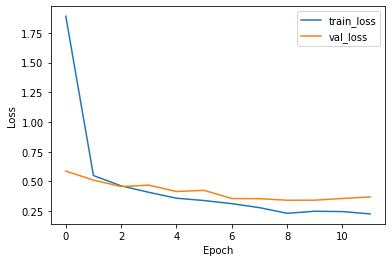

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8246 - auc_6: 0.9188 - auc_7: 0.9158 - loss: 0.3606 - precision_3: 0.7848 - recall_3: 0.8340
Test Accuracy: 82.08%
Precision: 0.81
Recall: 0.83
AUC-ROC: 0.93
AUC-PR: 0.93
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[99 23]
 [20 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       122
           1       0.81      0.83      0.82       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

AUC Score: 0.82
Precision: 0.81
Recall: 0.83
F1 Score: 0.82
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.64
Matthews Correlation Coefficient (MCC): 0.64
Balanced Accuracy: 0.82
Time taken: 719.77 seconds
Monkeypox Predictions: 50.42% (121/240)
Non-Monkeypox Predictions: 49.58% (119/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.
To

In [12]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5670 - auc_8: 0.5946 - auc_9: 0.5643 - loss: 2.0072 - precision_4: 0.5410 - recall_4: 0.5449 - val_accuracy: 0.7333 - val_auc_8: 0.8452 - val_auc_9: 0.8397 - val_loss: 0.5251 - val_precision_4: 0.8293 - val_recall_4: 0.5763
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7377 - auc_8: 0.8169 - auc_9: 0.8237 - loss: 0.5619 - precision_4: 0.7791 - recall_4: 0.6613 - val_accuracy: 0.7542 - val_auc_8: 0.8781 - val_auc_9: 0.8862 - val_loss: 0.4885 - val_precision_4: 0.9155 - val_recall_4: 0.5508
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7758 - auc_8: 0.8772 - auc_9: 0.8827 - loss: 0.4450 - precision_4: 0.8133 - recall_4: 0.7206 - val_accuracy: 0.8042 - val_auc_8: 0.9009 - val_auc_9: 0.9082 - val_loss: 0.4076 - val_precision_4: 0.7983 - val_recall_4: 0.8051
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8586 - auc_8: 0.9348 - auc_9: 0.9344 - loss: 0.3389 - precision_4: 0

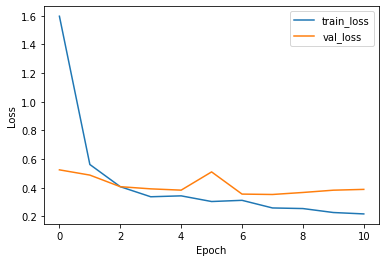

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8286 - auc_8: 0.9224 - auc_9: 0.9189 - loss: 0.3670 - precision_4: 0.7661 - recall_4: 0.8778
Test Accuracy: 83.33%
Precision: 0.80
Recall: 0.87
AUC-ROC: 0.93
AUC-PR: 0.93
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[ 97  25]
 [ 15 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       122
           1       0.80      0.87      0.84       118

    accuracy                           0.83       240
   macro avg       0.84      0.83      0.83       240
weighted avg       0.84      0.83      0.83       240

AUC Score: 0.83
Precision: 0.80
Recall: 0.87
F1 Score: 0.84
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.67
Matthews Correlation Coefficient (MCC): 0.67
Balanced Accuracy: 0.83
Time taken: 664.46 seconds
Monkeypox Predictions: 53.33% (128/240)
Non-Monkeypox Predictions: 46.67% (112/240)
The model predicted more Monkeypox cases than non-Monkeypox cases

In [13]:
import numpy as np
from tensorflow.keras.applications import VGG19  # Change to VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the VGG-19 model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# L2 Regularization

# 50 epochs

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5694 - auc_10: 0.5824 - auc_11: 0.5630 - loss: 2.4252 - precision_5: 0.5571 - recall_5: 0.5558 - val_accuracy: 0.8042 - val_auc_10: 0.8638 - val_auc_11: 0.8690 - val_loss: 0.8207 - val_precision_5: 0.8381 - val_recall_5: 0.7458
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7715 - auc_10: 0.8678 - auc_11: 0.8814 - loss: 0.8152 - precision_5: 0.7760 - recall_5: 0.7773 - val_accuracy: 0.8125 - val_auc_10: 0.9103 - val_auc_11: 0.9188 - val_loss: 0.6805 - val_precision_5: 0.7829 - val_recall_5: 0.8559
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8317 - auc_10: 0.9151 - auc_11: 0.9256 - loss: 0.6331 - precision_5: 0.8386 - recall_5: 0.8184 - val_accuracy: 0.7875 - val_auc_10: 0.9162 - val_auc_11: 0.9251 - val_loss: 0.6373 - val_precision_5: 0.7310 - val_recall_5: 0.8983
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8414 - auc_10: 0.9314 - auc_11: 0.9390 - loss: 0.5621 - prec

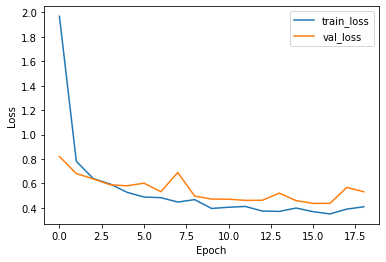

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8636 - auc_10: 0.9377 - auc_11: 0.9319 - loss: 0.4299 - precision_5: 0.8971 - recall_5: 0.7792
Test Accuracy: 85.83%
Precision: 0.92
Recall: 0.78
AUC-ROC: 0.94
AUC-PR: 0.95
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[114   8]
 [ 26  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       122
           1       0.92      0.78      0.84       118

    accuracy                           0.86       240
   macro avg       0.87      0.86      0.86       240
weighted avg       0.87      0.86      0.86       240

AUC Score: 0.86
Precision: 0.92
Recall: 0.78
F1 Score: 0.84
PR AUC: 0.90
Cohen's Kappa Coefficient: 0.72
Matthews Correlation Coefficient (MCC): 0.72
Balanced Accuracy: 0.86
Time taken: 1146.12 seconds
Monkeypox Predictions: 41.67% (100/240)
Non-Monkeypox Predictions: 58.33% (140/240)
The model predicted more non-Monkeypox cases than Monkeypox ca

In [14]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base with L2 regularization
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5647 - auc_12: 0.5689 - auc_13: 0.5788 - loss: 2.9697 - precision_6: 0.5906 - recall_6: 0.5596 - val_accuracy: 0.7292 - val_auc_12: 0.8271 - val_auc_13: 0.8316 - val_loss: 0.8662 - val_precision_6: 0.7154 - val_recall_6: 0.7458
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7214 - auc_12: 0.7854 - auc_13: 0.8196 - loss: 0.9023 - precision_6: 0.7592 - recall_6: 0.7100 - val_accuracy: 0.7500 - val_auc_12: 0.8814 - val_auc_13: 0.8847 - val_loss: 0.7738 - val_precision_6: 0.9265 - val_recall_6: 0.5339
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7959 - auc_12: 0.8778 - auc_13: 0.8900 - loss: 0.7010 - precision_6: 0.8165 - recall_6: 0.7746 - val_accuracy: 0.7542 - val_auc_12: 0.8946 - val_auc_13: 0.9004 - val_loss: 0.6980 - val_precision_6: 0.6980 - val_recall_6: 0.8814
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8128 - auc_12: 0.8953 - auc_13: 0.9050 - loss: 0.6309 - 

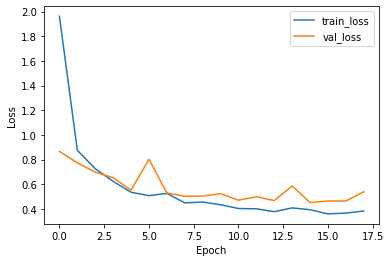

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8487 - auc_12: 0.9304 - auc_13: 0.9225 - loss: 0.4515 - precision_6: 0.8239 - recall_6: 0.8334
Test Accuracy: 84.58%
Precision: 0.85
Recall: 0.84
AUC-ROC: 0.93
AUC-PR: 0.93
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[104  18]
 [ 19  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       122
           1       0.85      0.84      0.84       118

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85
Precision: 0.85
Recall: 0.84
F1 Score: 0.84
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.69
Matthews Correlation Coefficient (MCC): 0.69
Balanced Accuracy: 0.85
Time taken: 1079.64 seconds
Monkeypox Predictions: 48.75% (117/240)
Non-Monkeypox Predictions: 51.25% (123/240)
The model predicted more non-Monkeypox cases than Monkeypox ca

In [15]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base with L2 regularization
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,870,465 (125.39 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5471 - auc_14: 0.5510 - auc_15: 0.5667 - loss: 4.5184 - precision_7: 0.5797 - recall_7: 0.5941 - val_accuracy: 0.6375 - val_auc_14: 0.7643 - val_auc_15: 0.7776 - val_loss: 1.0178 - val_precision_7: 0.8605 - val_recall_7: 0.3136
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6587 - auc_14: 0.7049 - auc_15: 0.7159 - loss: 1.0541 - precision_7: 0.6819 - recall_7: 0.6315 - val_accuracy: 0.7542 - val_auc_14: 0.8453 - val_auc_15: 0.8542 - val_loss: 0.7992 - val_precision_7: 0.7479 - val_recall_7: 0.7542
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7491 - auc_14: 0.8390 - auc_15: 0.8420 - loss: 0.7806 - precision_7: 0.7322 - recall_7: 0.7743 - val_accuracy: 0.7833 - val_auc_14: 0.8685 - val_auc_15: 0.8795 - val_loss: 0.7258 - val_precision_7: 0.7705 - val_recall_7: 0.7966
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8128 - auc_14: 0.8850 - auc_15: 0.9044 - loss: 0.6851 - 

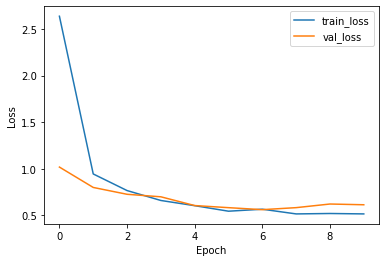

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8129 - auc_14: 0.9125 - auc_15: 0.9008 - loss: 0.5714 - precision_7: 0.7546 - recall_7: 0.8574
Test Accuracy: 81.25%
Precision: 0.80
Recall: 0.83
AUC-ROC: 0.91
AUC-PR: 0.92
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[97 25]
 [20 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       122
           1       0.80      0.83      0.81       118

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240

AUC Score: 0.81
Precision: 0.80
Recall: 0.83
F1 Score: 0.81
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.63
Balanced Accuracy: 0.81
Time taken: 609.90 seconds
Monkeypox Predictions: 51.25% (123/240)
Non-Monkeypox Predictions: 48.75% (117/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.


In [16]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base with L2 regularization
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Convolutional Layer

# 50 epochs

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,289,857 (77.40 MB)

 Trainable params: 264,449 (1.01 MB)

 Non-trainable params: 20,025,408 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5890 - auc: 0.6289 - auc_1: 0.6132 - loss: 0.7503 - precision: 0.5995 - recall: 0.5326 - val_accuracy: 0.5833 - val_auc: 0.7774 - val_auc_1: 0.7999 - val_loss: 0.6456 - val_precision: 0.5429 - val_recall: 0.9661
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7342 - auc: 0.7966 - auc_1: 0.8068 - loss: 0.5630 - precision: 0.7471 - recall: 0.7146 - val_accuracy: 0.6125 - val_auc: 0.7768 - val_auc_1: 0.8010 - val_loss: 0.6275 - val_precision: 0.5641 - val_recall: 0.9322
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8000 - auc: 0.8818 - auc_1: 0.8761 - loss: 0.4398 - precision: 0.7946 - recall: 0.8008 - val_accuracy: 0.6167 - val_auc: 0.7948 - val_auc_1: 0.8217 - val_loss: 0.6107 - val_precision: 0.5684 - val_recall: 0.9153
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8278 - auc: 0.9196 - auc_1: 0.9243 - loss: 0.3707 - precision: 0.8145 - recall: 0.8552 - val_accuracy: 0.766

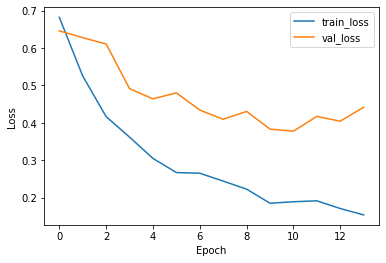

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8470 - auc: 0.9306 - auc_1: 0.9194 - loss: 0.3432 - precision: 0.8327 - recall: 0.8203
Test Accuracy: 82.92%
Precision: 0.84
Recall: 0.81
AUC-ROC: 0.92
AUC-PR: 0.92
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[104  18]
 [ 23  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       122
           1       0.84      0.81      0.82       118

    accuracy                           0.83       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.83      0.83       240

AUC Score: 0.83
Precision: 0.84
Recall: 0.81
F1 Score: 0.82
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.66
Matthews Correlation Coefficient (MCC): 0.66
Balanced Accuracy: 0.83
Monkeypox Predictions: 47.08% (113/240)
Non-Monkeypox Predictions: 52.92% (127/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 813.66 second

In [10]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base with additional layers
model = Sequential([
    vgg_base,
    GlobalMaxPooling2D(),  # Pooling layer
    BatchNormalization(),   # Batch normalization layer
    Dense(256, activation='relu'),  # Change from Conv2D to Dense layer
    Dropout(0.5),          # Dropout layer to reduce overfitting
    Dense(512, activation='relu'),  # Dense layer
    Dropout(0.5),          # Another dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,289,857 (77.40 MB)

 Trainable params: 264,449 (1.01 MB)

 Non-trainable params: 20,025,408 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5658 - auc_2: 0.6017 - auc_3: 0.5966 - loss: 0.7561 - precision_1: 0.5583 - recall_1: 0.5468 - val_accuracy: 0.4917 - val_auc_2: 0.7569 - val_auc_3: 0.7738 - val_loss: 0.7793 - val_precision_1: 0.4917 - val_recall_1: 1.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7426 - auc_2: 0.8122 - auc_3: 0.8023 - loss: 0.5549 - precision_1: 0.7343 - recall_1: 0.7339 - val_accuracy: 0.6167 - val_auc_2: 0.7461 - val_auc_3: 0.7767 - val_loss: 0.6376 - val_precision_1: 0.5707 - val_recall_1: 0.8898
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8182 - auc_2: 0.9017 - auc_3: 0.9031 - loss: 0.3976 - precision_1: 0.8326 - recall_1: 0.8052 - val_accuracy: 0.6917 - val_auc_2: 0.8440 - val_auc_3: 0.8311 - val_loss: 0.5478 - val_precision_1: 0.8143 - val_recall_1: 0.4831
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8462 - auc_2: 0.9345 - auc_3: 0.9366 - loss: 0.3282 - precision_1: 0

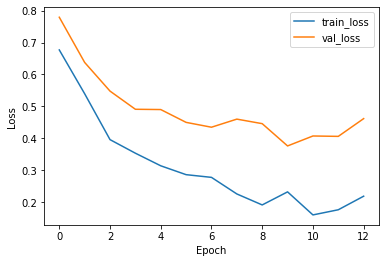

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8537 - auc_2: 0.9323 - auc_3: 0.9192 - loss: 0.3285 - precision_1: 0.8480 - recall_1: 0.8184
Test Accuracy: 82.50%
Precision: 0.85
Recall: 0.79
AUC-ROC: 0.91
AUC-PR: 0.91
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[105  17]
 [ 25  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       122
           1       0.85      0.79      0.82       118

    accuracy                           0.82       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.83      0.82      0.82       240

AUC Score: 0.82
Precision: 0.85
Recall: 0.79
F1 Score: 0.82
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.65
Matthews Correlation Coefficient (MCC): 0.65
Balanced Accuracy: 0.82
Monkeypox Predictions: 45.83% (110/240)
Non-Monkeypox Predictions: 54.17% (130/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 758.82 

In [11]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base with additional layers
model = Sequential([
    vgg_base,
    GlobalMaxPooling2D(),  # Pooling layer
    BatchNormalization(),   # Batch normalization layer
    Dense(256, activation='relu'),  # Change from Conv2D to Dense layer
    Dropout(0.5),          # Dropout layer to reduce overfitting
    Dense(512, activation='relu'),  # Dense layer
    Dropout(0.5),          # Another dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

2024-10-16 12:05:21.087980: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 12:05:21.192178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 12:05:21.235226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 12:05:21.248385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 12:05:21.328256: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,289,857 (77.40 MB)

 Trainable params: 264,449 (1.01 MB)

 Non-trainable params: 20,025,408 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5963 - auc: 0.6118 - auc_1: 0.5829 - loss: 0.7510 - precision: 0.5856 - recall: 0.5696 - val_accuracy: 0.6333 - val_auc: 0.7601 - val_auc_1: 0.7748 - val_loss: 0.6458 - val_precision: 0.9412 - val_recall: 0.2712
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7394 - auc: 0.8153 - auc_1: 0.8341 - loss: 0.5210 - precision: 0.7524 - recall: 0.7094 - val_accuracy: 0.6958 - val_auc: 0.8088 - val_auc_1: 0.8191 - val_loss: 0.5867 - val_precision: 0.6531 - val_recall: 0.8136
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7738 - auc: 0.8654 - auc_1: 0.8620 - loss: 0.4596 - precision: 0.7612 - recall: 0.7912 - val_accuracy: 0.7667 - val_auc: 0.8257 - val_auc_1: 0.8130 - val_loss: 0.5509 - val_precision: 0.7583 - val_recall: 0.7712
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8403 - auc: 0.9109 - auc_1: 0.9218 - loss: 0.3746 - precision: 0.8527 - recall: 0.8212 - val_accuracy: 0

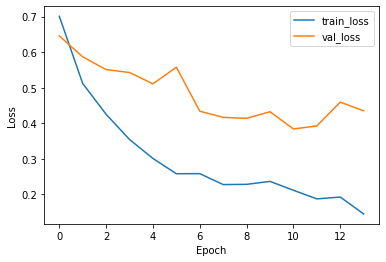

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8479 - auc: 0.9295 - auc_1: 0.9163 - loss: 0.3355 - precision: 0.8197 - recall: 0.8464
Test Accuracy: 81.67%
Precision: 0.82
Recall: 0.80
AUC-ROC: 0.91
AUC-PR: 0.91
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[102  20]
 [ 24  94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       122
           1       0.82      0.80      0.81       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

AUC Score: 0.82
Precision: 0.82
Recall: 0.80
F1 Score: 0.81
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.63
Balanced Accuracy: 0.82
Monkeypox Predictions: 47.50% (114/240)
Non-Monkeypox Predictions: 52.50% (126/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 810.75 second

In [9]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG-19 base with additional layers
model = Sequential([
    vgg_base,
    GlobalMaxPooling2D(),  # Pooling layer
    BatchNormalization(),   # Batch normalization layer
    Dense(256, activation='relu'),  # Change from Conv2D to Dense layer
    Dropout(0.5),          # Dropout layer to reduce overfitting
    Dense(512, activation='relu'),  # Dense layer
    Dropout(0.5),          # Another dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Attention mechanism

# 50 epochs

In [10]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, Multiply, Reshape, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the attention mechanism
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Attention mechanism
# Reshape for attention
attention = Reshape((7*7, 512))(vgg_output)  # Reshape the output to (batch_size, 49, 512)
attention_probs = tf.keras.layers.Dense(49, activation='softmax')(attention)  # Shape: (batch_size, 49)
attention_probs = Reshape((7, 7, 1))(attention_probs)  # Shape: (batch_size, 7, 7, 1)

# Apply attention
attention_output = Multiply()([vgg_output, attention_probs])

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(attention_output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


ValueError: The total size of the tensor must be unchanged. Received: input_shape=(49, 49), target_shape=(7, 7, 1)

# 150 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, Multiply, Reshape, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the attention mechanism
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Attention mechanism
# Reshape for attention
attention = Reshape((7*7, 512))(vgg_output)  # Reshape the output to (batch_size, 49, 512)
attention_probs = tf.keras.layers.Dense(49, activation='softmax')(attention)  # Shape: (batch_size, 49)
attention_probs = Reshape((7, 7, 1))(attention_probs)  # Shape: (batch_size, 7, 7, 1)

# Apply attention
attention_output = Multiply()([vgg_output, attention_probs])

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(attention_output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, Multiply, Reshape, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the attention mechanism
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Attention mechanism
# Reshape for attention
attention = Reshape((7*7, 512))(vgg_output)  # Reshape the output to (batch_size, 49, 512)
attention_probs = tf.keras.layers.Dense(49, activation='softmax')(attention)  # Shape: (batch_size, 49)
attention_probs = Reshape((7, 7, 1))(attention_probs)  # Shape: (batch_size, 7, 7, 1)

# Apply attention
attention_output = Multiply()([vgg_output, attention_probs])

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(attention_output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Spatial Dropout

# 50 epochs

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 7, 7, 512)      │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5108 - auc_16: 0.4985 - auc_17: 0.5027 - loss: 0.8837 - precision_8: 0.5066 - recall_8: 0.5440 - val_accuracy: 0.5417 - val_auc_16: 0.6605 - val_auc_17: 0.6915 - val_loss: 0.6810 - val_precision_8: 0.5180 - val_recall_8: 0.9746
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5681 - auc_16: 0.5719 - auc_17: 0.5633 - loss: 0.7740 - precision_8: 0.5700 - recall_8: 0.5787 - val_accuracy: 0.5458 - val_auc_16: 0.6481 - val_auc_17: 0.6970 - val_loss: 0.6756 - val_precision_8: 0.5213 - val_recall_8: 0.9322
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5686 - auc_16: 0.5787 - auc_17: 0.5914 - loss: 0.7452 - precision_8: 0.5821 - recall_8: 0.5482 - val_accuracy: 0.5208 - val_auc_16: 0.6506 - val_auc_17: 0.6997 - val_loss: 0.7006 - val_precision_8: 0.5066 - val_recall_8: 0.9831
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5709 - auc_16: 0.5802 - auc_17: 0.5752 - loss: 0.7560 - prec

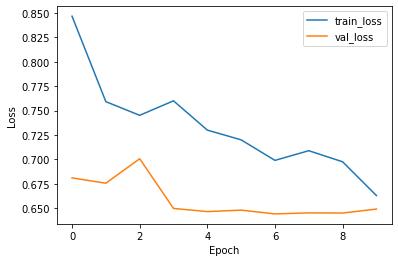

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6163 - auc_16: 0.7249 - auc_17: 0.7165 - loss: 0.6465 - precision_8: 0.5514 - recall_8: 0.7015
Test Accuracy: 61.67%
Precision: 0.59
Recall: 0.72
AUC-ROC: 0.71
AUC-PR: 0.75
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[63 59]
 [33 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.52      0.58       122
           1       0.59      0.72      0.65       118

    accuracy                           0.62       240
   macro avg       0.62      0.62      0.61       240
weighted avg       0.62      0.62      0.61       240

AUC Score: 0.62
Precision: 0.59
Recall: 0.72
F1 Score: 0.65
PR AUC: 0.72
Cohen's Kappa Coefficient: 0.24
Matthews Correlation Coefficient (MCC): 0.24
Balanced Accuracy: 0.62
Time taken: 573.63 seconds
Monkeypox Predictions: 60.00% (144/240)
Non-Monkeypox Predictions: 40.00% (96/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.
T

In [30]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, SpatialDropout2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                            matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Apply Spatial Dropout
x = SpatialDropout2D(0.5)(vgg_output)

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")

# 150 epochs

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 7, 7, 512)      │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4694 - auc_18: 0.4790 - auc_19: 0.4722 - loss: 0.8460 - precision_9: 0.4606 - recall_9: 0.4949 - val_accuracy: 0.4917 - val_auc_18: 0.6350 - val_auc_19: 0.6606 - val_loss: 0.7104 - val_precision_9: 0.4917 - val_recall_9: 1.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5669 - auc_18: 0.5883 - auc_19: 0.5995 - loss: 0.7390 - precision_9: 0.5604 - recall_9: 0.6388 - val_accuracy: 0.5250 - val_auc_18: 0.6500 - val_auc_19: 0.6886 - val_loss: 0.6842 - val_precision_9: 0.5088 - val_recall_9: 0.9746
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5334 - auc_18: 0.5529 - auc_19: 0.5406 - loss: 0.7810 - precision_9: 0.5352 - recall_9: 0.4952 - val_accuracy: 0.5500 - val_auc_18: 0.6597 - val_auc_19: 0.7015 - val_loss: 0.6745 - val_precision_9: 0.5229 - val_recall_9: 0.9661
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5549 - auc_18: 0.5861 - auc_19: 0.5657 - loss: 0.7462 - 

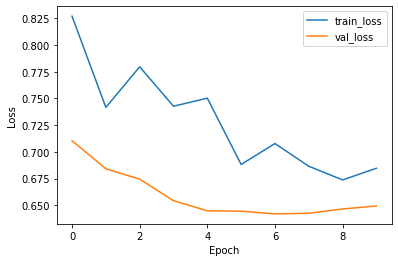

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6839 - auc_18: 0.7266 - auc_19: 0.7103 - loss: 0.6386 - precision_9: 0.6805 - recall_9: 0.5472
Test Accuracy: 67.08%
Precision: 0.70
Recall: 0.58
AUC-ROC: 0.72
AUC-PR: 0.74
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[93 29]
 [50 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       122
           1       0.70      0.58      0.63       118

    accuracy                           0.67       240
   macro avg       0.68      0.67      0.67       240
weighted avg       0.68      0.67      0.67       240

AUC Score: 0.67
Precision: 0.70
Recall: 0.58
F1 Score: 0.63
PR AUC: 0.74
Cohen's Kappa Coefficient: 0.34
Matthews Correlation Coefficient (MCC): 0.34
Balanced Accuracy: 0.67
Time taken: 588.25 seconds
Monkeypox Predictions: 40.42% (97/240)
Non-Monkeypox Predictions: 59.58% (143/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
T

In [31]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, SpatialDropout2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Apply Spatial Dropout
x = SpatialDropout2D(0.5)(vgg_output)

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")

# 200 epochs

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 7, 7, 512)      │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5259 - auc_20: 0.5197 - auc_21: 0.5239 - loss: 0.8709 - precision_10: 0.5395 - recall_10: 0.5856 - val_accuracy: 0.5500 - val_auc_20: 0.6372 - val_auc_21: 0.6705 - val_loss: 0.6743 - val_precision_10: 0.5263 - val_recall_10: 0.8475
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5106 - auc_20: 0.5549 - auc_21: 0.5764 - loss: 0.7559 - precision_10: 0.5134 - recall_10: 0.5612 - val_accuracy: 0.6042 - val_auc_20: 0.6633 - val_auc_21: 0.7024 - val_loss: 0.6553 - val_precision_10: 0.6575 - val_recall_10: 0.4068
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5267 - auc_20: 0.5594 - auc_21: 0.5687 - loss: 0.7526 - precision_10: 0.5434 - recall_10: 0.4993 - val_accuracy: 0.6417 - val_auc_20: 0.7001 - val_auc_21: 0.7354 - val_loss: 0.6455 - val_precision_10: 0.6270 - val_recall_10: 0.6695
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5478 - auc_20: 0.5739 - auc_21: 0.5754 - los

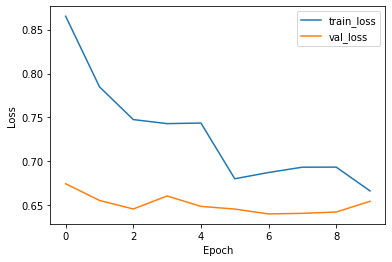

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6826 - auc_20: 0.7193 - auc_21: 0.7132 - loss: 0.6315 - precision_10: 0.6762 - recall_10: 0.5559
Test Accuracy: 66.67%
Precision: 0.70
Recall: 0.57
AUC-ROC: 0.70
AUC-PR: 0.74
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[93 29]
 [51 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       122
           1       0.70      0.57      0.63       118

    accuracy                           0.67       240
   macro avg       0.67      0.67      0.66       240
weighted avg       0.67      0.67      0.66       240

AUC Score: 0.67
Precision: 0.70
Recall: 0.57
F1 Score: 0.63
PR AUC: 0.74
Cohen's Kappa Coefficient: 0.33
Matthews Correlation Coefficient (MCC): 0.34
Balanced Accuracy: 0.67
Time taken: 588.32 seconds
Monkeypox Predictions: 40.00% (96/240)
Non-Monkeypox Predictions: 60.00% (144/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.

In [32]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, SpatialDropout2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Apply Spatial Dropout
x = SpatialDropout2D(0.5)(vgg_output)

# Global Average Pooling and Dense Layers
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")

# Multi-Head Attention

# 50 epochs

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg19 (Functional)  │ (None, 7, 7, 512) │ 20,024,384 │ input_layer_33[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg19[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 1, 512)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 512)    │    525,568 │ reshape_4[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 512)       │          0 │ multi_head_atten… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 512)       │          0 │ flatten_11[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 512)       │    262,656 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 512)       │          0 │ dense_30[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 1)         │        513 │ dropout_22[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,813,121 (79.40 MB)

 Trainable params: 788,737 (3.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5429 - auc_22: 0.5443 - auc_23: 0.5506 - loss: 0.7108 - precision_11: 0.5610 - recall_11: 0.5591 - val_accuracy: 0.5542 - val_auc_22: 0.6231 - val_auc_23: 0.6556 - val_loss: 0.6723 - val_precision_11: 0.5342 - val_recall_11: 0.7288
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5687 - auc_22: 0.6162 - auc_23: 0.6211 - loss: 0.6729 - precision_11: 0.5703 - recall_11: 0.5616 - val_accuracy: 0.6625 - val_auc_22: 0.7106 - val_auc_23: 0.7391 - val_loss: 0.6181 - val_precision_11: 0.6555 - val_recall_11: 0.6610
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7208 - auc_22: 0.7655 - auc_23: 0.7728 - loss: 0.5886 - precision_11: 0.6987 - recall_11: 0.7782 - val_accuracy: 0.6542 - val_auc_22: 0.7566 - val_auc_23: 0.7644 - val_loss: 0.5932 - val_precision_11: 0.7536 - val_recall_11: 0.4407
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6996 - auc_22: 0.7849 - auc_23: 0.8070 - loss: 0

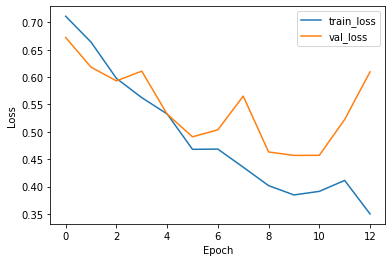

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7973 - auc_22: 0.8827 - auc_23: 0.8574 - loss: 0.4505 - precision_11: 0.8273 - recall_11: 0.6869
Test Accuracy: 78.33%
Precision: 0.88
Recall: 0.65
AUC-ROC: 0.88
AUC-PR: 0.88
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[111  11]
 [ 41  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       122
           1       0.88      0.65      0.75       118

    accuracy                           0.78       240
   macro avg       0.80      0.78      0.78       240
weighted avg       0.80      0.78      0.78       240

AUC Score: 0.78
Precision: 0.88
Recall: 0.65
F1 Score: 0.75
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.56
Matthews Correlation Coefficient (MCC): 0.58
Balanced Accuracy: 0.78
Time taken: 760.53 seconds
Monkeypox Predictions: 36.67% (88/240)
Non-Monkeypox Predictions: 63.33% (152/240)
The model predicted more non-Monkeypox cases than Monkeypox ca

In [33]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Reshape the output for Multi-Head Attention
# Flatten the output from the VGG model and create a sequence
vgg_output_flattened = GlobalAveragePooling2D()(vgg_output)
vgg_output_reshaped = Reshape((1, vgg_output_flattened.shape[1]))(vgg_output_flattened)  # Reshape for attention

# Apply Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(vgg_output_reshaped, vgg_output_reshaped)

# Reshape back for Dense layers
attention_output_flattened = Flatten()(attention_output)

# Add Dense Layers
x = Dropout(0.5)(attention_output_flattened)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg19 (Functional)  │ (None, 7, 7, 512) │ 20,024,384 │ input_layer_35[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg19[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 1, 512)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 512)    │    525,568 │ reshape_5[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 512)       │          0 │ multi_head_atten… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 512)       │          0 │ flatten_12[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 512)       │    262,656 │ dropout_24[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_25          │ (None, 512)       │          0 │ dense_32[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1)         │        513 │ dropout_25[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,813,121 (79.40 MB)

 Trainable params: 788,737 (3.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4939 - auc_24: 0.5002 - auc_25: 0.5139 - loss: 0.7046 - precision_12: 0.4838 - recall_12: 0.4681 - val_accuracy: 0.5333 - val_auc_24: 0.6468 - val_auc_25: 0.6879 - val_loss: 0.6668 - val_precision_12: 0.5169 - val_recall_12: 0.7797
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5965 - auc_24: 0.6662 - auc_25: 0.6831 - loss: 0.6478 - precision_12: 0.5992 - recall_12: 0.6000 - val_accuracy: 0.6792 - val_auc_24: 0.7208 - val_auc_25: 0.7470 - val_loss: 0.6097 - val_precision_12: 0.7470 - val_recall_12: 0.5254
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6804 - auc_24: 0.7521 - auc_25: 0.7772 - loss: 0.5926 - precision_12: 0.7081 - recall_12: 0.6399 - val_accuracy: 0.6958 - val_auc_24: 0.7670 - val_auc_25: 0.7775 - val_loss: 0.5727 - val_precision_12: 0.7103 - val_recall_12: 0.6441
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7138 - auc_24: 0.8070 - auc_25: 0.8117 - los

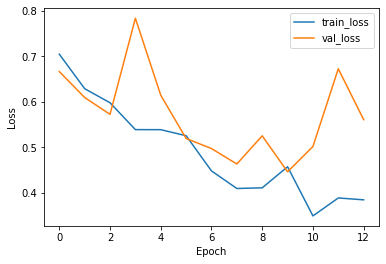

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8101 - auc_24: 0.8845 - auc_25: 0.8520 - loss: 0.4396 - precision_12: 0.8162 - recall_12: 0.7374
Test Accuracy: 80.42%
Precision: 0.85
Recall: 0.73
AUC-ROC: 0.88
AUC-PR: 0.88
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[107  15]
 [ 32  86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       122
           1       0.85      0.73      0.79       118

    accuracy                           0.80       240
   macro avg       0.81      0.80      0.80       240
weighted avg       0.81      0.80      0.80       240

AUC Score: 0.80
Precision: 0.85
Recall: 0.73
F1 Score: 0.79
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.61
Matthews Correlation Coefficient (MCC): 0.61
Balanced Accuracy: 0.80
Time taken: 760.46 seconds
Monkeypox Predictions: 42.08% (101/240)
Non-Monkeypox Predictions: 57.92% (139/240)
The model predicted more non-Monkeypox cases than Monkeypox c

In [34]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Reshape the output for Multi-Head Attention
# Flatten the output from the VGG model and create a sequence
vgg_output_flattened = GlobalAveragePooling2D()(vgg_output)
vgg_output_reshaped = Reshape((1, vgg_output_flattened.shape[1]))(vgg_output_flattened)  # Reshape for attention

# Apply Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(vgg_output_reshaped, vgg_output_reshaped)

# Reshape back for Dense layers
attention_output_flattened = Flatten()(attention_output)

# Add Dense Layers
x = Dropout(0.5)(attention_output_flattened)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg19 (Functional)  │ (None, 7, 7, 512) │ 20,024,384 │ input_layer_37[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg19[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 1, 512)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 512)    │    525,568 │ reshape_6[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 512)       │          0 │ multi_head_atten… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 512)       │          0 │ flatten_13[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 512)       │    262,656 │ dropout_27[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 512)       │          0 │ dense_34[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 1)         │        513 │ dropout_28[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,813,121 (79.40 MB)

 Trainable params: 788,737 (3.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5477 - auc_26: 0.5174 - auc_27: 0.5277 - loss: 0.7081 - precision_13: 0.5559 - recall_13: 0.4770 - val_accuracy: 0.5792 - val_auc_26: 0.6241 - val_auc_27: 0.6570 - val_loss: 0.6720 - val_precision_13: 0.6024 - val_recall_13: 0.4237
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5535 - auc_26: 0.5556 - auc_27: 0.5892 - loss: 0.7030 - precision_13: 0.5684 - recall_13: 0.6427 - val_accuracy: 0.6333 - val_auc_26: 0.6790 - val_auc_27: 0.7168 - val_loss: 0.6329 - val_precision_13: 0.6230 - val_recall_13: 0.6441
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6512 - auc_26: 0.7115 - auc_27: 0.7389 - loss: 0.6208 - precision_13: 0.6663 - recall_13: 0.6292 - val_accuracy: 0.6292 - val_auc_26: 0.7565 - val_auc_27: 0.7683 - val_loss: 0.6465 - val_precision_13: 0.8919 - val_recall_13: 0.2797
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6596 - auc_26: 0.7415 - auc_27: 0.7661 - los

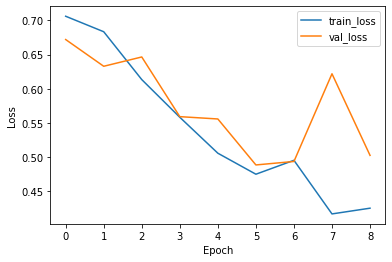

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7772 - auc_26: 0.8478 - auc_27: 0.8160 - loss: 0.4953 - precision_13: 0.7608 - recall_13: 0.7250
Test Accuracy: 77.08%
Precision: 0.81
Recall: 0.70
AUC-ROC: 0.85
AUC-PR: 0.85
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[102  20]
 [ 35  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       122
           1       0.81      0.70      0.75       118

    accuracy                           0.77       240
   macro avg       0.78      0.77      0.77       240
weighted avg       0.77      0.77      0.77       240

AUC Score: 0.77
Precision: 0.81
Recall: 0.70
F1 Score: 0.75
PR AUC: 0.83
Cohen's Kappa Coefficient: 0.54
Matthews Correlation Coefficient (MCC): 0.54
Balanced Accuracy: 0.77
Time taken: 534.28 seconds
Monkeypox Predictions: 42.92% (103/240)
Non-Monkeypox Predictions: 57.08% (137/240)
The model predicted more non-Monkeypox cases than Monkeypox c

In [35]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Reshape the output for Multi-Head Attention
# Flatten the output from the VGG model and create a sequence
vgg_output_flattened = GlobalAveragePooling2D()(vgg_output)
vgg_output_reshaped = Reshape((1, vgg_output_flattened.shape[1]))(vgg_output_flattened)  # Reshape for attention

# Apply Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(vgg_output_reshaped, vgg_output_reshaped)

# Reshape back for Dense layers
attention_output_flattened = Flatten()(attention_output)

# Add Dense Layers
x = Dropout(0.5)(attention_output_flattened)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Dense Layers using LeakyReLU

# 50 epochs

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,418,625 (77.89 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5329 - auc_28: 0.5133 - auc_29: 0.5238 - loss: 0.7936 - precision_14: 0.5411 - recall_14: 0.5660 - val_accuracy: 0.5833 - val_auc_28: 0.6367 - val_auc_29: 0.6746 - val_loss: 0.6663 - val_precision_14: 0.5672 - val_recall_14: 0.6441
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6192 - auc_28: 0.6588 - auc_29: 0.6624 - loss: 0.6568 - precision_14: 0.6390 - recall_14: 0.5983 - val_accuracy: 0.6083 - val_auc_28: 0.6715 - val_auc_29: 0.7112 - val_loss: 0.6407 - val_precision_14: 0.6429 - val_recall_14: 0.4576
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6571 - auc_28: 0.7096 - auc_29: 0.7152 - loss: 0.6291 - precision_14: 0.6943 - recall_14: 0.6123 - val_accuracy: 0.6167 - val_auc_28: 0.7161 - val_auc_29: 0.7460 - val_loss: 0.6364 - val_precision_14: 0.7708 - val_recall_14: 0.3136
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6792 - auc_28: 0.7227 - auc_29: 0.7498 - loss: 0

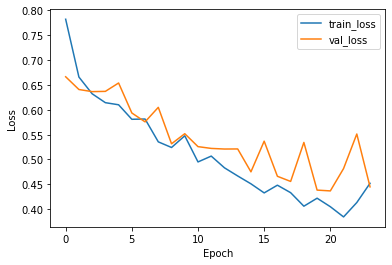

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8249 - auc_28: 0.8842 - auc_29: 0.8552 - loss: 0.4278 - precision_14: 0.8316 - recall_14: 0.7584
Test Accuracy: 81.67%
Precision: 0.86
Recall: 0.75
AUC-ROC: 0.88
AUC-PR: 0.88
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[108  14]
 [ 30  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       122
           1       0.86      0.75      0.80       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

AUC Score: 0.82
Precision: 0.86
Recall: 0.75
F1 Score: 0.80
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.64
Balanced Accuracy: 0.82
Time taken: 1380.07 seconds
Monkeypox Predictions: 42.50% (102/240)
Non-Monkeypox Predictions: 57.50% (138/240)
The model predicted more non-Monkeypox cases than Monkeypox 

In [36]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Global Average Pooling
pooled_output = GlobalAveragePooling2D()(vgg_output)

# Dense Layers with LeakyReLU activation
x = Dense(512)(pooled_output)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,418,625 (77.89 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5309 - auc_30: 0.5363 - auc_31: 0.5275 - loss: 0.7633 - precision_15: 0.5221 - recall_15: 0.5292 - val_accuracy: 0.5708 - val_auc_30: 0.6630 - val_auc_31: 0.6912 - val_loss: 0.6602 - val_precision_15: 0.5449 - val_recall_15: 0.7712
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5880 - auc_30: 0.6192 - auc_31: 0.6446 - loss: 0.6942 - precision_15: 0.5894 - recall_15: 0.6611 - val_accuracy: 0.6125 - val_auc_30: 0.6804 - val_auc_31: 0.7087 - val_loss: 0.6489 - val_precision_15: 0.7193 - val_recall_15: 0.3475
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6034 - auc_30: 0.6611 - auc_31: 0.6669 - loss: 0.6672 - precision_15: 0.6429 - recall_15: 0.4666 - val_accuracy: 0.6250 - val_auc_30: 0.7133 - val_auc_31: 0.7417 - val_loss: 0.6333 - val_precision_15: 0.7692 - val_recall_15: 0.3390
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6502 - auc_30: 0.7148 - auc_31: 0.7231 - los

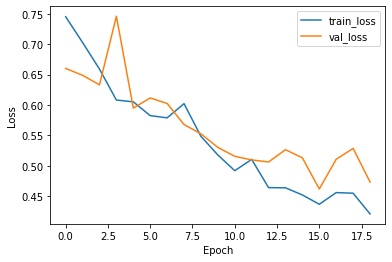

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7948 - auc_30: 0.8721 - auc_31: 0.8425 - loss: 0.4679 - precision_15: 0.7502 - recall_15: 0.8027
Test Accuracy: 78.75%
Precision: 0.78
Recall: 0.79
AUC-ROC: 0.86
AUC-PR: 0.87
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[96 26]
 [25 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       122
           1       0.78      0.79      0.78       118

    accuracy                           0.79       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.79      0.79      0.79       240

AUC Score: 0.79
Precision: 0.78
Recall: 0.79
F1 Score: 0.78
PR AUC: 0.84
Cohen's Kappa Coefficient: 0.57
Matthews Correlation Coefficient (MCC): 0.57
Balanced Accuracy: 0.79
Time taken: 1096.48 seconds
Monkeypox Predictions: 49.58% (119/240)
Non-Monkeypox Predictions: 50.42% (121/240)
The model predicted more non-Monkeypox cases than Monkeypox case

In [37]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Global Average Pooling
pooled_output = GlobalAveragePooling2D()(vgg_output)

# Dense Layers with LeakyReLU activation
x = Dense(512)(pooled_output)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_45 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,418,625 (77.89 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5262 - auc_34: 0.5491 - auc_35: 0.5476 - loss: 0.7715 - precision_17: 0.5221 - recall_17: 0.5076 - val_accuracy: 0.5458 - val_auc_34: 0.6450 - val_auc_35: 0.6890 - val_loss: 0.7090 - val_precision_17: 1.0000 - val_recall_17: 0.0763
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5561 - auc_34: 0.5875 - auc_35: 0.6078 - loss: 0.7095 - precision_17: 0.5689 - recall_17: 0.4707 - val_accuracy: 0.6292 - val_auc_34: 0.6877 - val_auc_35: 0.7164 - val_loss: 0.6391 - val_precision_17: 0.6933 - val_recall_17: 0.4407
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6041 - auc_34: 0.6446 - auc_35: 0.6901 - loss: 0.6599 - precision_17: 0.6208 - recall_17: 0.5836 - val_accuracy: 0.6375 - val_auc_34: 0.7120 - val_auc_35: 0.7353 - val_loss: 0.6286 - val_precision_17: 0.6013 - val_recall_17: 0.7797
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6718 - auc_34: 0.7537 - auc_35: 0.7621 - los

Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 22.


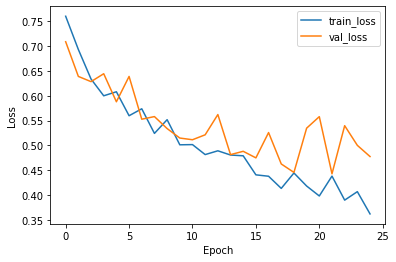

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8196 - auc_34: 0.8804 - auc_35: 0.8509 - loss: 0.4380 - precision_17: 0.7965 - recall_17: 0.7956
Test Accuracy: 80.42%
Precision: 0.82
Recall: 0.77
AUC-ROC: 0.87
AUC-PR: 0.87
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[102  20]
 [ 27  91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       122
           1       0.82      0.77      0.79       118

    accuracy                           0.80       240
   macro avg       0.81      0.80      0.80       240
weighted avg       0.81      0.80      0.80       240

AUC Score: 0.80
Precision: 0.82
Recall: 0.77
F1 Score: 0.79
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.61
Matthews Correlation Coefficient (MCC): 0.61
Balanced Accuracy: 0.80
Time taken: 1430.55 seconds
Monkeypox Predictions: 46.25% (111/240)
Non-Monkeypox Predictions: 53.75% (129/240)
The model predicted more non-Monkeypox cases than Monkeypox 

In [39]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve, auc, 
                             precision_score, recall_score, f1_score, 
                             balanced_accuracy_score, cohen_kappa_score, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained VGG-19 model without the top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base VGG-19 model
for layer in vgg_base.layers:
    layer.trainable = False

# Define the input for the model
inputs = Input(shape=(224, 224, 3))
vgg_output = vgg_base(inputs)

# Global Average Pooling
pooled_output = GlobalAveragePooling2D()(vgg_output)

# Dense Layers with LeakyReLU activation
x = Dense(512)(pooled_output)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)  # LeakyReLU activation
x = Dropout(0.5)(x)  # Dropout layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs, outputs)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")
    
# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")
